# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.156324e+01     1.516139e+01
 * time: 0.0033190250396728516
     1     6.148300e+01     9.167763e+00
 * time: 0.009752035140991211
     2     5.499426e+01     1.265718e+01
 * time: 0.024543046951293945
     3     3.967312e+01     8.857589e+00
 * time: 0.11772608757019043
     4     2.931214e+01     6.985826e+00
 * time: 0.13869810104370117
     5     2.449756e+01     6.392097e+00
 * time: 0.15668201446533203
     6     1.137129e+01     1.696555e+00
 * time: 0.17495393753051758
     7     1.074197e+01     4.316379e+00
 * time: 0.1873340606689453
     8     9.508071e+00     2.491854e+00
 * time: 0.2028179168701172
     9     9.045065e+00     2.494054e+00
 * time: 0.2176799774169922
    10     8.516534e+00     3.671856e+00
 * time: 0.27044105529785156
    11     7.817300e+00     1.603221e+00
 * time: 0.2852010726928711
    12     7.244735e+00     1.811799e+00
 * time: 0.29715704917907715
    13     6.682160e+00     1.665587e+00
 * time:

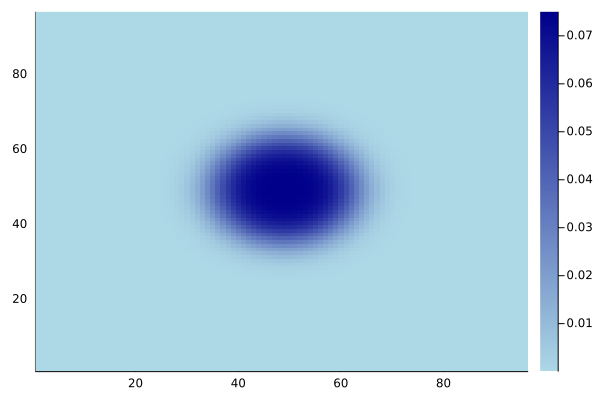

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))